#The Science of Decisions    
***Zach Farmer***      
*****

##Table of contents      
[Background](#Background)    
[Questions For Investigation](#Questions)       
   * [Indepedent & Dependent variables](#What are our variables)  
   * [Hypothesis and Tests](#Hypothesis and Tests)   
   * [Descriptive Statistics](#Descriptive Statistics)     
   * [Visualization](#Visualizations)  
   * [Statistical test](#Statistical test)      
   * [Why](#Why)    
   
[References](#References)      
   
   
   

###Statistics: The Science of Decisions Project Instructions   
*****

<a id="Background"></a>

####Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color="red">RED</font>, <font color="blue">BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color="purple">PURPLE</font>, <font color="orange">ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

<a id="Questions"></a>

####Questions For Investigation   

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.      

To try out the Stroop task for yourself, Go to this [link](https://www.google.com/url?q=https://faculty.washington.edu/chudler/java/ready.html&sa=D&usg=AFQjCNFRXmkTGaTjMtk1Xh0SPh-RiaZerA). This page has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this [dataset](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&usg=AFQjCNGAjbK9VYD5GsQ8c_iRT9zH9QdOVg) which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.   

1. *What is our independent variable? What is our dependent variable?*          
2. *What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.*             
3. *Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.*    
4. *Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.*        
5. *Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?*      
6. *Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!*      

In [125]:
import pandas as pd
from ggplot import *
import pprint
import matplotlib as plt  
import scipy


In [2]:
## Load csv Stroop data into a pandas DataFrame
csv = !find *.csv
Stroop_df = pd.read_csv(csv[0])

In [3]:
# First look at the data
Stroop_df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


<a id="What are our variables"></a>

###What is our independent variable? What is our dependent variable?     
**Dependent variable:** The time neccessary to verbally identify the font color of the words (which are words of colors themselves) in the experiment.      
**Independent variable:** The congruency between the word and font color (for this experiment the word itself is a controlled variable (unchanging between the both tests) and we are only perturbing the color of the text.) 
  

<a id="Hypothesis and Tests"></a>
******

###What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.    
($\mu$ = Population Mean Time)      
**Hypothesis:**  (two-tailed test for Stroop task sample data)       
*Null Hypothesis* $(H_{0})$: $[\mu_{Congr.} = \mu_{Incongr.}]$ or $[\mu_{Congr.} - \mu_{Incongr.} = 0]$       
The population mean time it takes to verbalize the font color of a word is no different between the color being congruent with the word or incongruent with the word.     
 

*Alternative Hypothesis* $(H_{a})$: $[\mu_{Congr.} \ne \mu_{Incongr.}]$ or $[\mu_{Congr.} - \mu_{Incongr.} \ne 0]$        
There is a difference in the population mean time it takes to verbalize the font color of a word between congruent and Incongruent words and font colors. 

**Type of statistical test:** Dependent t-test sometimes refered to as a paired t-test or matched t-test. This type of test compares the means between two related groups. In our case we have one group of subjects who take one test, a 'treatment' is applied and then the same individuals take another test. Our goal in this analysis is to determine if the means from the first test and the means from the second test are stastically significantly different. There are 4 major assumptions we have to make when using this test. The first assumptions is that the dependent variable is measured on a continuous scale. This assumption is true in our case as the dependent variable time is inherently continuous. The second assumption is that our independent variable are related or matched pairs. This is also true in our case. Third there should not be any significant outliers in differences between the two related groups, the following plot will show this is generally the case. Fourth and finally the differences in the dependent variable should roughly be normally distributed. Again the following plot will confirm that the differences are roughly gaussian.    




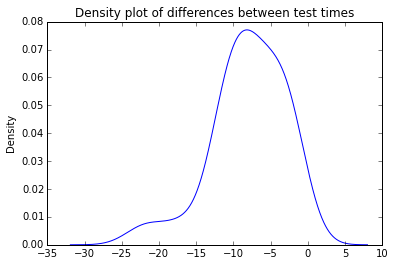

In [166]:
%matplotlib inline 
## determine if the differences between times is relatively normal
diff_df = Stroop_df["Congruent"] - Stroop_df["Incongruent"]

diff_df.plot(kind = "kde",
             title="Density plot of differences between test times")

<a id="Descriptive Statistics"></a>    
********

###Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.  

In [4]:
Stroop_df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [145]:
## Find IQR range for both tests
print "The IQR range for the Stroop dataset: \n{0}".\
format(Stroop_df.quantile(.75)-Stroop_df.quantile(.25))

The IQR range for the Stroop dataset: 
Congruent      4.30550
Incongruent    5.33475
dtype: float64


<a id="Visualizations"></a>    
*****

###Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.         


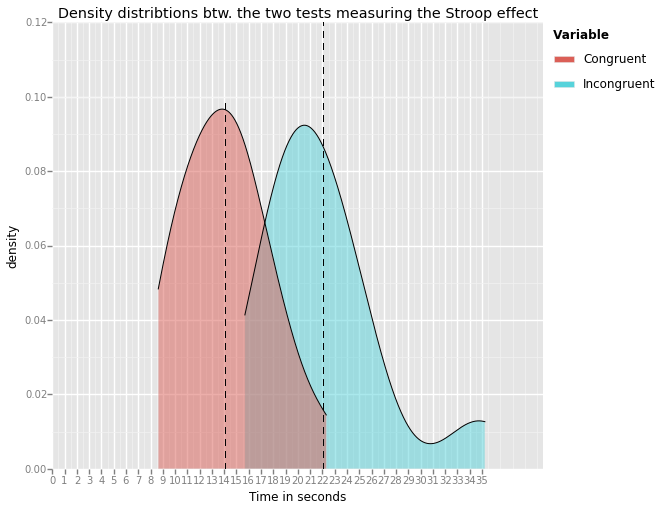

<ggplot: (277911093)>

In [124]:
## Melt the dataframe for ggplot graphing methodology to properly group
## by test type(congruent, incongruent. Use density plots with default 
## gaussian kernel to display the to tests results
plot_df = pd.melt(Stroop_df)

## find means for each tests
means = plot_df.groupby("variable").mean()
congruent_mean = means.iloc[0]["value"]
incongruent_mean = means.iloc[1]["value"]

##plot the two test results together using gaussian kernel density
ggplot(aes(x='value', fill = "variable"),data=plot_df) + \
        geom_density(alpha = .5) + \
        geom_vline(aes(xintercept = congruent_mean,\
                   colour = "black"),linetype = "dashed",) +\
        geom_vline(aes(xintercept = incongruent_mean,\
                   colour = "black"), linetype = "dashed") +\
        scale_x_continuous(breaks = range(0,36,1)) +\
        xlab("Time in seconds") +\
        ylab("density") + \
        ggtitle("Density distribtions btw. the \
two tests measuring the Stroop effect")


**Notes:** The black dashed lines represent the corresponding means for the two tests.      

We can very clearly see two different distributions here and I suspect that our analytical tests will confirm this. It looks like the test containing congruent words and font colors is much faster to verbalize then the test containing the incongruent words and font colors. There is a slight bimodal distribution in the incongruent test times.  



<a id="Statistical test"></a>    
******

###Perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

**Confidence level:** 95%       
**Critical Statistic Value:** 0.05     

The following paired dependent t-test using scipy.stats function returns a two-tailed result. This is appropriate as we are hypothesising that there is no change in time difference, neither more time or less time between the tests. 

In [143]:
#Calculates the T-test on TWO RELATED samples of scores, a and b.
t_test_results = scipy.stats.ttest_rel(Stroop_df["Congruent"], Stroop_df["Incongruent"])

print "The t-statistic for df = 23 is: {0}\nThe two-tailed p-value is: {1}".\
format(round(t_test_results[0],5), round(t_test_results[1],8))

The t-statistic for df = 23 is: -8.02071
The two-tailed p-value is: 4e-08


**Analysis:** With a p-value that is way below 0.05 I would feel very comfortable about rejecting the null hypothesis. Recall that our null hypothesis was that no differences exist between verbalization times for congruent and incongruent words and fonts. This means that we can say that there is a statistically significant difference between verbalization times when words are not congruent with their font colors (our alternative hypothesis).  These results match my expectations, after attempting the test myself I found it significantly slower when the words where incongruent and my plotting of the data confirmed this personal experience. While I did not specifically test to see if the incongurent test was longer then the congruent, I have little doubt that if I ran such a test I would find it to be the case.   

<a id="Why"></a>
******

###What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Good question! I would hypothesis from my own personal experiences that reading the word came faster and was much easier then identifying the color. When the test case was congurent I was verbalizing as fast as I could speak, I had no trouble identifying the words and as they were congruent the font colors. With the incongruent test, I was much slower and found myself making some mistakes and verbalizing the word and not the font. I can only conclude that identifying the words comes easier to our brains then the colors. Furthermore it takes more conscience effort to ingnore the word when it is incongruent and verbalize the font color. The discontinuity between the two forms of information could likely be replicated in other experiments. I have actually participated in a very similar exercise as a 'game' on a mobile application. The 'game' presented you with a screen full of identical and random placed single leafs. All of the leafs pointed in the same direction and all of the leafs moved in unison scrolling across the screen in one of either four directions (up,down,right,left). When the leafs were a the color green you were asked to 'swipe' on your mobile screen in the direction that the leafs were pointing and when the leafs turned yellow you were required to swipe in the direction that all the leafs were scrolling. The discontinuity was introduced by changing the direction the leafs pointed and the direction they scrolled every time you swiped. The directions of the leafs and the colors changed every swipe and often times there were incongruency between the direction the leafs were pointing and the direction they were scrolling. When the leafs pointed in the same direction as the scrolling it was faster to accuractly swipe in the correct direction. The test was challenging your ability to prioritize between identifying shapes and identifying movement.   

<a id="References"></a>

###References    
[Dependent T-Test using SPSS Statistics](https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php)    
[Institute for Digital Education and Education](http://www.ats.ucla.edu/stat/stata/whatstat/whatstat.htm)   
[General pandas](http://pandas.pydata.org/pandas-docs/stable/index.html)   
[Neuroscience for Kids](#https://faculty.washington.edu/chudler/words.html)       
